In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
%config InlineBackend.figure_formats = ['svg']

# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 8)
colors = sns.color_palette("colorblind")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_97756/3747977332.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 8)


### Importing Data

In [2]:
file = 'Signum_160M_SP_SL2048_2Btok_BS256'
res1 = pd.read_pickle('../data/'+file+'.pkl')
res1

,optim,num_steps,bs,lr,wd,beta1,clip,ppl_train,ppl_all,ppl_test
32,signSGD,6200,256,0.000063,0.1,0.9500,1000,26.278663,"[49224.59490472155, 42406.78403091354, 35192.7...",26.675875
62,signSGD,6200,256,0.000063,0.1,0.9750,1,23.993897,"[38699.66547974927, 20001.49992104605, 19556.2...",25.631251
61,signSGD,6200,256,0.000063,0.1,0.9000,1,26.428511,"[56506.34175555603, 50899.49786704065, 23618.1...",27.999768
60,signSGD,6200,256,0.000063,0.1,0.9875,1,24.955537,"[54212.93542585073, 52479.324549985045, 48357....",25.717169
34,signSGD,6200,256,0.000063,0.1,0.9000,1000,28.800962,"[56136.42676701048, 53171.41030924173, 23996.7...",28.031177
...,...,...,...,...,...,...,...,...,...,...
4,signSGD,6200,256,0.004000,0.1,0.9875,1,8321401011501822950025742927857412439748441128...,"[49957.3968173116, 50393.460395813505, 29921.0...",57971.970823
3,signSGD,6200,256,0.004000,0.1,0.9750,1,1901220427704146211575485167905453385022468390...,"[17029.793539950806, 3158.0760523831927, 2861....",5089572166926004497995401708374080037419772212...
2,signSGD,6200,256,0.004000,0.1,0.9500,1,2291.027067,"[8761.572895084526, 4413.2489003610735, 2384.6...",2311.131983
1,signSGD,6200,256,0.004000,0.1,0.9000,1,2811.404847,"[16903.616936936203, 16031.243975904248, 12466...",2558.882286


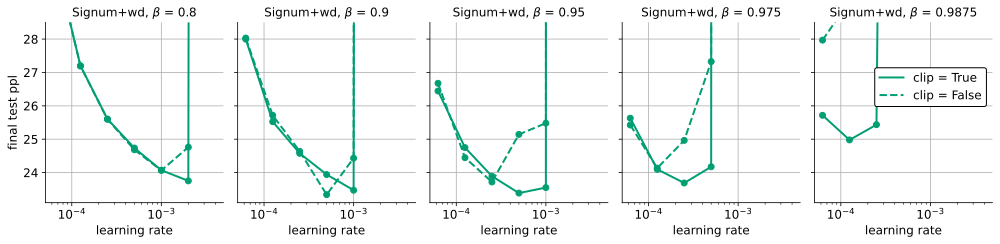

In [4]:
lrs = [0.0000625, 0.000125, 0.00025, 0.0005, 0.001, 0.002, 0.004]
clipz = [1.0, 1000.0]
beta1s_n = [0.8, 0.9, 0.95, 0.975, 0.9875]

fig, axes = plt.subplots(1, 5, figsize=(14, 3.5), sharey=True)

for j, beta1 in enumerate(beta1s_n):
    ax = axes[j]
    isclip=['true','false']
    for i, clipp in enumerate(clipz):
        linestyle = '-' if i == 0 else '--'
        lrs = [0.0000625, 0.000125, 0.00025, 0.0005, 0.001, 0.002, 0.004] if i == 0 else [0.0000625, 0.000125, 0.00025, 0.0005, 0.001, 0.002]
        #if beta1==0.8: lrs=[0.0000625, 0.000125, 0.00025, 0.0005, 0.001, 0.002]
        subset = res1[(res1['clip'] == clipp) & (res1['beta1'] == beta1)]
        lrs_plt = np.array(subset['lr'])
        data = np.array(subset['ppl_test'])
        ax.plot(lrs_plt, data, linestyle=linestyle, marker='o', color=colors[2], label=f'clip = {isclip[i]}')

    ax.set_xscale('log')
    ax.set_ylim([23.1, 28.5])
    ax.set_title(r'Signum+wd, $\beta$ = ' + str(beta1))
    ax.set_xlabel('learning rate')
    ax.grid(True)

    # Only add legend to the last subplot
    if j == len(beta1s_n) - 1:
        legend_elements = [
            Line2D([0], [0], color=colors[2], linestyle='-', label='clip = True'),
            Line2D([0], [0], color=colors[2], linestyle='--', label='clip = False')
        ]
        ax.legend(handles=legend_elements, framealpha=1, facecolor='white',
                  edgecolor='black', loc='lower right', bbox_to_anchor=(1, 0.5))

# Set y-label only once (leftmost plot)
axes[0].set_ylabel('final test ppl')

plt.tight_layout()
#plt.savefig('betas_160M_signEMA_complete.pdf', format="pdf", bbox_inches="tight")
plt.show()